In [1]:
!pip install rich
%load_ext rich

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 KB 4.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 KB 13.7 MB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2


In [2]:
import builtins
import rich

builtins.print = rich.print

In [3]:
# 1. 데이터 가져오기
from sklearn.datasets import load_diabetes
# df_X, df_y = load_diabetes(as_frame=True, return_X_y=True)

diabetes = load_diabetes(as_frame=True)
df_X, df_y = diabetes['data'], diabetes['target']

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times 
`n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of 
Statistics (with discussion), 407-499.
(https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

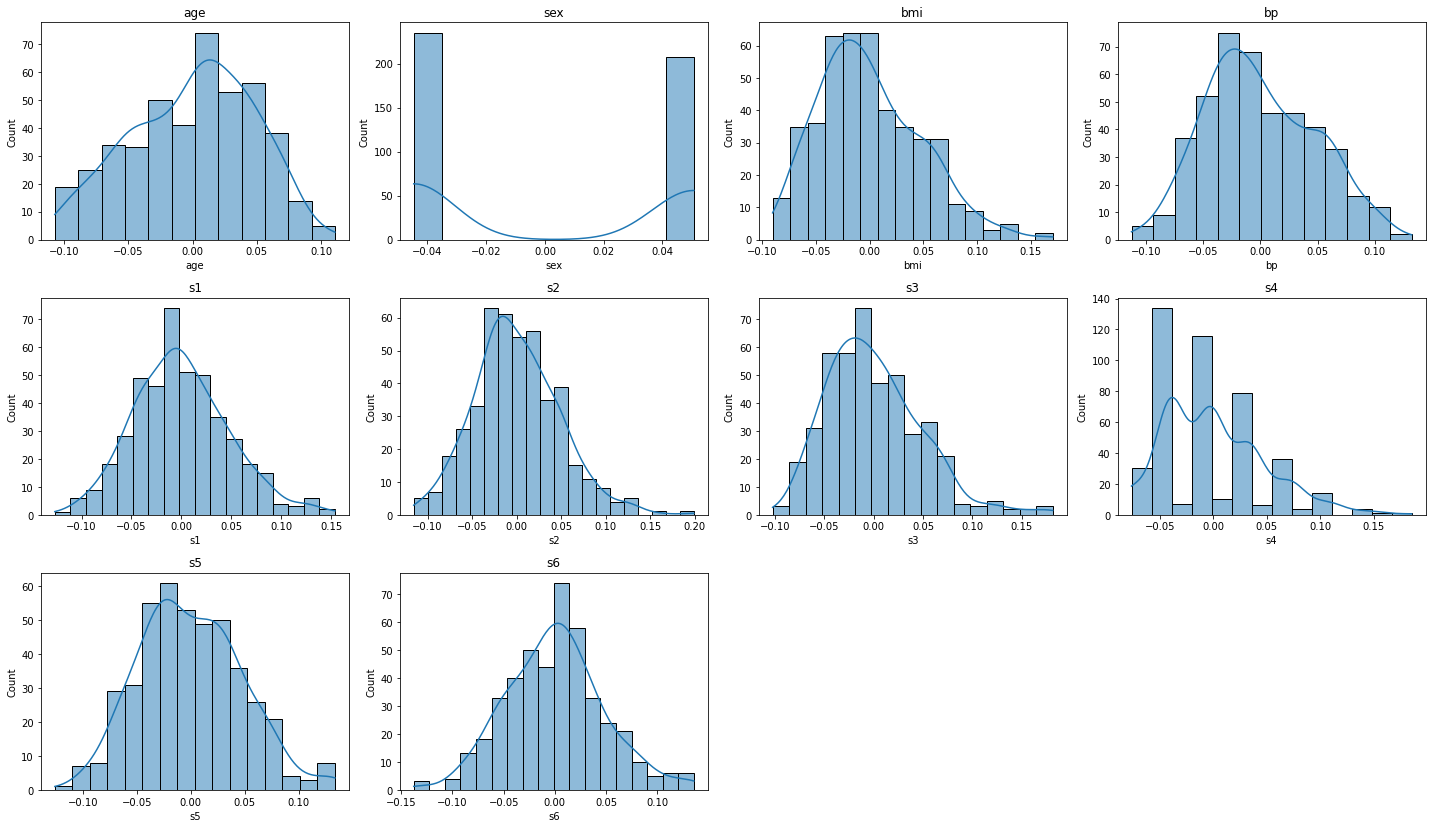

In [5]:
# plot
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_distribution(dataframe):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(dataframe.columns, 1):
        plt.subplot(4, 4, i)
        sns.histplot(dataframe[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()

    
plot_feature_distribution(df_X)

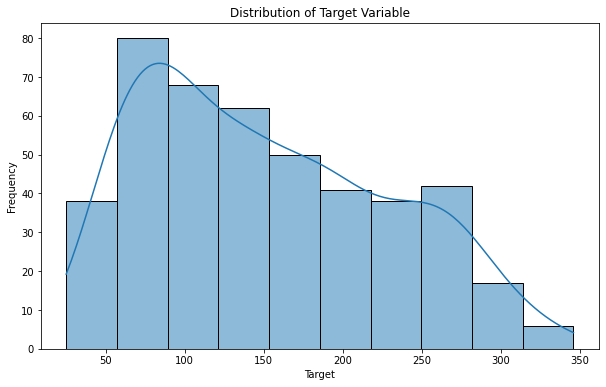

In [6]:
# 타겟 변수의 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(df_y, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

# data `sex`
어떻게 binary sex가 값이 제 각각일 수가 있는거지?

In [7]:
df_X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


## `df_X.to_numpy()[:0]`


```py
> df_X.to_numpy()[:0]

array([], shape=(0, 10), dtype=float64)
```

위와 같이 하면 df_X[:0]값이 null값이 들어간다. 이는 header row가 들어가서 그렇다.
이를 해결하기 위해서는 그냥 df.values사용하면 된다.

In [8]:
# 2~3. to numpy
df_X = df_X.values
df_y = df_y.values

In [9]:
# 4. split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

def printer(a):
    print(f'shape: {a.shape}, type: {type(a)}')


for a in (X_train, X_test, y_train, y_test):
    printer(a) 

shape: (353, 10), type: <class 'numpy.ndarray'>

shape: (89, 10), type: <class 'numpy.ndarray'>

shape: (353,), type: <class 'numpy.ndarray'>

shape: (89,), type: <class 'numpy.ndarray'>

In [10]:
# 5. weight & bias
import numpy as np
np.random.seed(0)

W = np.random.rand(X_train.shape[1])
b = np.random.rand()

def predict(X, W, b):
    prediction = np.dot(X, W) + b
    return prediction

In [11]:
# 6. loss function

def MSE(a, b):
    return ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균

def loss(x, w, b, y):
    predictions = predict(x, w, b)
    L = MSE(predictions, y)
    return L

- [`numerical diff`](https://en.wikipedia.org/wiki/Numerical_differentiation)

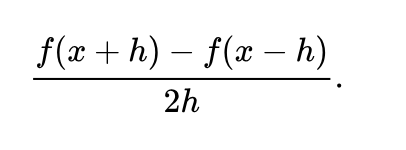


In [12]:
# 7. gradient

# def numerical_diff(f, x):
#     h = 1e-4
#     return (f(x + h) - f(x - h)) / (2 * h)

# def gradient(x, w, b, y):
#     dw = numerical_diff(lambda new_w: loss(x, new_w, b, y), w)
#     db = numerical_diff(lambda new_b: loss(x, w, new_b, y), b)
#     return dw, db

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = predict(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [31]:
# 8. hyperparameter
def initialize_parameters_he(n_features):
    return np.random.randn(n_features) * np.sqrt(2.0 / n_features)


n_features = X_train.shape[1]
W = initialize_parameters_he(n_features)
b = np.random.rand()

LEARNING_RATE = 0.001
losses = []

for i in range(1,150000):
    dW, db = gradient(X_train, W, b, y_train)

    W -= LEARNING_RATE * dW         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 

    L = loss(X_train, W, b, y_train)
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))    

Iteration 100 : Loss 21712.2760

Iteration 200 : Loss 16542.5482

Iteration 300 : Loss 13075.9795

Iteration 400 : Loss 10750.6173

Iteration 500 : Loss 9189.9263

Iteration 600 : Loss 8141.6099

Iteration 700 : Loss 7436.6172

Iteration 800 : Loss 6961.6760

Iteration 900 : Loss 6640.8883

Iteration 1000 : Loss 6423.3991

Iteration 1100 : Loss 6275.1327

Iteration 1200 : Loss 6173.2570

Iteration 1300 : Loss 6102.4733

Iteration 1400 : Loss 6052.5307

Iteration 1500 : Loss 6016.5605

Iteration 1600 : Loss 5989.9605

Iteration 1700 : Loss 5969.6468

Iteration 1800 : Loss 5953.5530

Iteration 1900 : Loss 5940.2947

Iteration 2000 : Loss 5928.9440

Iteration 2100 : Loss 5918.8794

Iteration 2200 : Loss 5909.6841

Iteration 2300 : Loss 5901.0792

Iteration 2400 : Loss 5892.8774

Iteration 2500 : Loss 5884.9535

Iteration 2600 : Loss 5877.2234

Iteration 2700 : Loss 5869.6307

Iteration 2800 : Loss 5862.1378

Iteration 2900 : Loss 5854.7192

Iteration 3000 : Loss 5847.3580

Iteration 3100 : Loss 5840.0427

Iteration 3200 : Loss 5832.7657

Iteration 3300 : Loss 5825.5217

Iteration 3400 : Loss 5818.3074

Iteration 3500 : Loss 5811.1204

Iteration 3600 : Loss 5803.9590

Iteration 3700 : Loss 5796.8221

Iteration 3800 : Loss 5789.7089

Iteration 3900 : Loss 5782.6190

Iteration 4000 : Loss 5775.5520

Iteration 4100 : Loss 5768.5075

Iteration 4200 : Loss 5761.4854

Iteration 4300 : Loss 5754.4854

Iteration 4400 : Loss 5747.5075

Iteration 4500 : Loss 5740.5514

Iteration 4600 : Loss 5733.6173

Iteration 4700 : Loss 5726.7048

Iteration 4800 : Loss 5719.8140

Iteration 4900 : Loss 5712.9447

Iteration 5000 : Loss 5706.0969

Iteration 5100 : Loss 5699.2705

Iteration 5200 : Loss 5692.4654

Iteration 5300 : Loss 5685.6816

Iteration 5400 : Loss 5678.9190

Iteration 5500 : Loss 5672.1774

Iteration 5600 : Loss 5665.4569

Iteration 5700 : Loss 5658.7573

Iteration 5800 : Loss 5652.0786

Iteration 5900 : Loss 5645.4207

Iteration 6000 : Loss 5638.7836

Iteration 6100 : Loss 5632.1671

Iteration 6200 : Loss 5625.5712

Iteration 6300 : Loss 5618.9958

Iteration 6400 : Loss 5612.4409

Iteration 6500 : Loss 5605.9064

Iteration 6600 : Loss 5599.3922

Iteration 6700 : Loss 5592.8982

Iteration 6800 : Loss 5586.4244

Iteration 6900 : Loss 5579.9708

Iteration 7000 : Loss 5573.5371

Iteration 7100 : Loss 5567.1234

Iteration 7200 : Loss 5560.7296

Iteration 7300 : Loss 5554.3557

Iteration 7400 : Loss 5548.0015

Iteration 7500 : Loss 5541.6670

Iteration 7600 : Loss 5535.3521

Iteration 7700 : Loss 5529.0568

Iteration 7800 : Loss 5522.7810

Iteration 7900 : Loss 5516.5246

Iteration 8000 : Loss 5510.2876

Iteration 8100 : Loss 5504.0698

Iteration 8200 : Loss 5497.8713

Iteration 8300 : Loss 5491.6920

Iteration 8400 : Loss 5485.5317

Iteration 8500 : Loss 5479.3905

Iteration 8600 : Loss 5473.2682

Iteration 8700 : Loss 5467.1649

Iteration 8800 : Loss 5461.0803

Iteration 8900 : Loss 5455.0146

Iteration 9000 : Loss 5448.9675

Iteration 9100 : Loss 5442.9391

Iteration 9200 : Loss 5436.9293

Iteration 9300 : Loss 5430.9380

Iteration 9400 : Loss 5424.9651

Iteration 9500 : Loss 5419.0106

Iteration 9600 : Loss 5413.0745

Iteration 9700 : Loss 5407.1566

Iteration 9800 : Loss 5401.2569

Iteration 9900 : Loss 5395.3753

Iteration 10000 : Loss 5389.5118

Iteration 10100 : Loss 5383.6664

Iteration 10200 : Loss 5377.8389

Iteration 10300 : Loss 5372.0292

Iteration 10400 : Loss 5366.2375

Iteration 10500 : Loss 5360.4634

Iteration 10600 : Loss 5354.7071

Iteration 10700 : Loss 5348.9684

Iteration 10800 : Loss 5343.2474

Iteration 10900 : Loss 5337.5438

Iteration 11000 : Loss 5331.8577

Iteration 11100 : Loss 5326.1890

Iteration 11200 : Loss 5320.5377

Iteration 11300 : Loss 5314.9037

Iteration 11400 : Loss 5309.2868

Iteration 11500 : Loss 5303.6872

Iteration 11600 : Loss 5298.1047

Iteration 11700 : Loss 5292.5392

Iteration 11800 : Loss 5286.9907

Iteration 11900 : Loss 5281.4592

Iteration 12000 : Loss 5275.9445

Iteration 12100 : Loss 5270.4466

Iteration 12200 : Loss 5264.9656

Iteration 12300 : Loss 5259.5012

Iteration 12400 : Loss 5254.0535

Iteration 12500 : Loss 5248.6223

Iteration 12600 : Loss 5243.2077

Iteration 12700 : Loss 5237.8096

Iteration 12800 : Loss 5232.4279

Iteration 12900 : Loss 5227.0626

Iteration 13000 : Loss 5221.7136

Iteration 13100 : Loss 5216.3809

Iteration 13200 : Loss 5211.0643

Iteration 13300 : Loss 5205.7639

Iteration 13400 : Loss 5200.4796

Iteration 13500 : Loss 5195.2114

Iteration 13600 : Loss 5189.9591

Iteration 13700 : Loss 5184.7227

Iteration 13800 : Loss 5179.5022

Iteration 13900 : Loss 5174.2976

Iteration 14000 : Loss 5169.1086

Iteration 14100 : Loss 5163.9355

Iteration 14200 : Loss 5158.7779

Iteration 14300 : Loss 5153.6360

Iteration 14400 : Loss 5148.5096

Iteration 14500 : Loss 5143.3988

Iteration 14600 : Loss 5138.3033

Iteration 14700 : Loss 5133.2233

Iteration 14800 : Loss 5128.1586

Iteration 14900 : Loss 5123.1092

Iteration 15000 : Loss 5118.0750

Iteration 15100 : Loss 5113.0561

Iteration 15200 : Loss 5108.0522

Iteration 15300 : Loss 5103.0634

Iteration 15400 : Loss 5098.0897

Iteration 15500 : Loss 5093.1310

Iteration 15600 : Loss 5088.1871

Iteration 15700 : Loss 5083.2582

Iteration 15800 : Loss 5078.3441

Iteration 15900 : Loss 5073.4448

Iteration 16000 : Loss 5068.5601

Iteration 16100 : Loss 5063.6902

Iteration 16200 : Loss 5058.8349

Iteration 16300 : Loss 5053.9942

Iteration 16400 : Loss 5049.1680

Iteration 16500 : Loss 5044.3563

Iteration 16600 : Loss 5039.5590

Iteration 16700 : Loss 5034.7761

Iteration 16800 : Loss 5030.0075

Iteration 16900 : Loss 5025.2532

Iteration 17000 : Loss 5020.5132

Iteration 17100 : Loss 5015.7873

Iteration 17200 : Loss 5011.0756

Iteration 17300 : Loss 5006.3780

Iteration 17400 : Loss 5001.6944

Iteration 17500 : Loss 4997.0248

Iteration 17600 : Loss 4992.3692

Iteration 17700 : Loss 4987.7274

Iteration 17800 : Loss 4983.0995

Iteration 17900 : Loss 4978.4855

Iteration 18000 : Loss 4973.8851

Iteration 18100 : Loss 4969.2985

Iteration 18200 : Loss 4964.7256

Iteration 18300 : Loss 4960.1663

Iteration 18400 : Loss 4955.6206

Iteration 18500 : Loss 4951.0884

Iteration 18600 : Loss 4946.5696

Iteration 18700 : Loss 4942.0644

Iteration 18800 : Loss 4937.5725

Iteration 18900 : Loss 4933.0939

Iteration 19000 : Loss 4928.6287

Iteration 19100 : Loss 4924.1767

Iteration 19200 : Loss 4919.7379

Iteration 19300 : Loss 4915.3123

Iteration 19400 : Loss 4910.8999

Iteration 19500 : Loss 4906.5005

Iteration 19600 : Loss 4902.1141

Iteration 19700 : Loss 4897.7407

Iteration 19800 : Loss 4893.3803

Iteration 19900 : Loss 4889.0328

Iteration 20000 : Loss 4884.6981

Iteration 20100 : Loss 4880.3763

Iteration 20200 : Loss 4876.0672

Iteration 20300 : Loss 4871.7709

Iteration 20400 : Loss 4867.4872

Iteration 20500 : Loss 4863.2162

Iteration 20600 : Loss 4858.9578

Iteration 20700 : Loss 4854.7120

Iteration 20800 : Loss 4850.4786

Iteration 20900 : Loss 4846.2578

Iteration 21000 : Loss 4842.0494

Iteration 21100 : Loss 4837.8533

Iteration 21200 : Loss 4833.6697

Iteration 21300 : Loss 4829.4983

Iteration 21400 : Loss 4825.3392

Iteration 21500 : Loss 4821.1923

Iteration 21600 : Loss 4817.0576

Iteration 21700 : Loss 4812.9351

Iteration 21800 : Loss 4808.8246

Iteration 21900 : Loss 4804.7262

Iteration 22000 : Loss 4800.6398

Iteration 22100 : Loss 4796.5655

Iteration 22200 : Loss 4792.5030

Iteration 22300 : Loss 4788.4525

Iteration 22400 : Loss 4784.4138

Iteration 22500 : Loss 4780.3869

Iteration 22600 : Loss 4776.3718

Iteration 22700 : Loss 4772.3685

Iteration 22800 : Loss 4768.3768

Iteration 22900 : Loss 4764.3968

Iteration 23000 : Loss 4760.4285

Iteration 23100 : Loss 4756.4717

Iteration 23200 : Loss 4752.5265

Iteration 23300 : Loss 4748.5928

Iteration 23400 : Loss 4744.6705

Iteration 23500 : Loss 4740.7597

Iteration 23600 : Loss 4736.8602

Iteration 23700 : Loss 4732.9721

Iteration 23800 : Loss 4729.0954

Iteration 23900 : Loss 4725.2299

Iteration 24000 : Loss 4721.3756

Iteration 24100 : Loss 4717.5326

Iteration 24200 : Loss 4713.7007

Iteration 24300 : Loss 4709.8799

Iteration 24400 : Loss 4706.0702

Iteration 24500 : Loss 4702.2716

Iteration 24600 : Loss 4698.4840

Iteration 24700 : Loss 4694.7074

Iteration 24800 : Loss 4690.9417

Iteration 24900 : Loss 4687.1869

Iteration 25000 : Loss 4683.4430

Iteration 25100 : Loss 4679.7099

Iteration 25200 : Loss 4675.9876

Iteration 25300 : Loss 4672.2760

Iteration 25400 : Loss 4668.5752

Iteration 25500 : Loss 4664.8851

Iteration 25600 : Loss 4661.2056

Iteration 25700 : Loss 4657.5368

Iteration 25800 : Loss 4653.8785

Iteration 25900 : Loss 4650.2307

Iteration 26000 : Loss 4646.5935

Iteration 26100 : Loss 4642.9668

Iteration 26200 : Loss 4639.3505

Iteration 26300 : Loss 4635.7446

Iteration 26400 : Loss 4632.1490

Iteration 26500 : Loss 4628.5638

Iteration 26600 : Loss 4624.9889

Iteration 26700 : Loss 4621.4243

Iteration 26800 : Loss 4617.8699

Iteration 26900 : Loss 4614.3257

Iteration 27000 : Loss 4610.7917

Iteration 27100 : Loss 4607.2678

Iteration 27200 : Loss 4603.7539

Iteration 27300 : Loss 4600.2502

Iteration 27400 : Loss 4596.7565

Iteration 27500 : Loss 4593.2727

Iteration 27600 : Loss 4589.7990

Iteration 27700 : Loss 4586.3352

Iteration 27800 : Loss 4582.8812

Iteration 27900 : Loss 4579.4371

Iteration 28000 : Loss 4576.0029

Iteration 28100 : Loss 4572.5785

Iteration 28200 : Loss 4569.1638

Iteration 28300 : Loss 4565.7588

Iteration 28400 : Loss 4562.3636

Iteration 28500 : Loss 4558.9780

Iteration 28600 : Loss 4555.6021

Iteration 28700 : Loss 4552.2357

Iteration 28800 : Loss 4548.8789

Iteration 28900 : Loss 4545.5317

Iteration 29000 : Loss 4542.1940

Iteration 29100 : Loss 4538.8658

Iteration 29200 : Loss 4535.5470

Iteration 29300 : Loss 4532.2376

Iteration 29400 : Loss 4528.9376

Iteration 29500 : Loss 4525.6469

Iteration 29600 : Loss 4522.3656

Iteration 29700 : Loss 4519.0935

Iteration 29800 : Loss 4515.8308

Iteration 29900 : Loss 4512.5772

Iteration 30000 : Loss 4509.3328

Iteration 30100 : Loss 4506.0977

Iteration 30200 : Loss 4502.8716

Iteration 30300 : Loss 4499.6546

Iteration 30400 : Loss 4496.4468

Iteration 30500 : Loss 4493.2479

Iteration 30600 : Loss 4490.0581

Iteration 30700 : Loss 4486.8773

Iteration 30800 : Loss 4483.7054

Iteration 30900 : Loss 4480.5425

Iteration 31000 : Loss 4477.3884

Iteration 31100 : Loss 4474.2433

Iteration 31200 : Loss 4471.1069

Iteration 31300 : Loss 4467.9794

Iteration 31400 : Loss 4464.8606

Iteration 31500 : Loss 4461.7506

Iteration 31600 : Loss 4458.6493

Iteration 31700 : Loss 4455.5568

Iteration 31800 : Loss 4452.4728

Iteration 31900 : Loss 4449.3975

Iteration 32000 : Loss 4446.3309

Iteration 32100 : Loss 4443.2728

Iteration 32200 : Loss 4440.2232

Iteration 32300 : Loss 4437.1822

Iteration 32400 : Loss 4434.1496

Iteration 32500 : Loss 4431.1256

Iteration 32600 : Loss 4428.1099

Iteration 32700 : Loss 4425.1027

Iteration 32800 : Loss 4422.1038

Iteration 32900 : Loss 4419.1134

Iteration 33000 : Loss 4416.1312

Iteration 33100 : Loss 4413.1573

Iteration 33200 : Loss 4410.1917

Iteration 33300 : Loss 4407.2344

Iteration 33400 : Loss 4404.2853

Iteration 33500 : Loss 4401.3443

Iteration 33600 : Loss 4398.4116

Iteration 33700 : Loss 4395.4869

Iteration 33800 : Loss 4392.5704

Iteration 33900 : Loss 4389.6620

Iteration 34000 : Loss 4386.7616

Iteration 34100 : Loss 4383.8692

Iteration 34200 : Loss 4380.9849

Iteration 34300 : Loss 4378.1085

Iteration 34400 : Loss 4375.2401

Iteration 34500 : Loss 4372.3796

Iteration 34600 : Loss 4369.5270

Iteration 34700 : Loss 4366.6822

Iteration 34800 : Loss 4363.8453

Iteration 34900 : Loss 4361.0163

Iteration 35000 : Loss 4358.1950

Iteration 35100 : Loss 4355.3815

Iteration 35200 : Loss 4352.5758

Iteration 35300 : Loss 4349.7778

Iteration 35400 : Loss 4346.9874

Iteration 35500 : Loss 4344.2048

Iteration 35600 : Loss 4341.4297

Iteration 35700 : Loss 4338.6623

Iteration 35800 : Loss 4335.9025

Iteration 35900 : Loss 4333.1503

Iteration 36000 : Loss 4330.4056

Iteration 36100 : Loss 4327.6684

Iteration 36200 : Loss 4324.9387

Iteration 36300 : Loss 4322.2165

Iteration 36400 : Loss 4319.5017

Iteration 36500 : Loss 4316.7944

Iteration 36600 : Loss 4314.0944

Iteration 36700 : Loss 4311.4018

Iteration 36800 : Loss 4308.7166

Iteration 36900 : Loss 4306.0387

Iteration 37000 : Loss 4303.3681

Iteration 37100 : Loss 4300.7047

Iteration 37200 : Loss 4298.0487

Iteration 37300 : Loss 4295.3998

Iteration 37400 : Loss 4292.7582

Iteration 37500 : Loss 4290.1237

Iteration 37600 : Loss 4287.4964

Iteration 37700 : Loss 4284.8762

Iteration 37800 : Loss 4282.2632

Iteration 37900 : Loss 4279.6572

Iteration 38000 : Loss 4277.0583

Iteration 38100 : Loss 4274.4664

Iteration 38200 : Loss 4271.8816

Iteration 38300 : Loss 4269.3037

Iteration 38400 : Loss 4266.7328

Iteration 38500 : Loss 4264.1689

Iteration 38600 : Loss 4261.6119

Iteration 38700 : Loss 4259.0618

Iteration 38800 : Loss 4256.5186

Iteration 38900 : Loss 4253.9823

Iteration 39000 : Loss 4251.4528

Iteration 39100 : Loss 4248.9301

Iteration 39200 : Loss 4246.4142

Iteration 39300 : Loss 4243.9051

Iteration 39400 : Loss 4241.4027

Iteration 39500 : Loss 4238.9070

Iteration 39600 : Loss 4236.4181

Iteration 39700 : Loss 4233.9358

Iteration 39800 : Loss 4231.4603

Iteration 39900 : Loss 4228.9913

Iteration 40000 : Loss 4226.5290

Iteration 40100 : Loss 4224.0732

Iteration 40200 : Loss 4221.6241

Iteration 40300 : Loss 4219.1815

Iteration 40400 : Loss 4216.7454

Iteration 40500 : Loss 4214.3158

Iteration 40600 : Loss 4211.8928

Iteration 40700 : Loss 4209.4762

Iteration 40800 : Loss 4207.0660

Iteration 40900 : Loss 4204.6623

Iteration 41000 : Loss 4202.2650

Iteration 41100 : Loss 4199.8741

Iteration 41200 : Loss 4197.4895

Iteration 41300 : Loss 4195.1113

Iteration 41400 : Loss 4192.7394

Iteration 41500 : Loss 4190.3738

Iteration 41600 : Loss 4188.0145

Iteration 41700 : Loss 4185.6615

Iteration 41800 : Loss 4183.3147

Iteration 41900 : Loss 4180.9741

Iteration 42000 : Loss 4178.6398

Iteration 42100 : Loss 4176.3116

Iteration 42200 : Loss 4173.9896

Iteration 42300 : Loss 4171.6737

Iteration 42400 : Loss 4169.3639

Iteration 42500 : Loss 4167.0603

Iteration 42600 : Loss 4164.7627

Iteration 42700 : Loss 4162.4712

Iteration 42800 : Loss 4160.1858

Iteration 42900 : Loss 4157.9063

Iteration 43000 : Loss 4155.6329

Iteration 43100 : Loss 4153.3655

Iteration 43200 : Loss 4151.1040

Iteration 43300 : Loss 4148.8485

Iteration 43400 : Loss 4146.5989

Iteration 43500 : Loss 4144.3552

Iteration 43600 : Loss 4142.1174

Iteration 43700 : Loss 4139.8855

Iteration 43800 : Loss 4137.6594

Iteration 43900 : Loss 4135.4392

Iteration 44000 : Loss 4133.2248

Iteration 44100 : Loss 4131.0162

Iteration 44200 : Loss 4128.8133

Iteration 44300 : Loss 4126.6162

Iteration 44400 : Loss 4124.4249

Iteration 44500 : Loss 4122.2393

Iteration 44600 : Loss 4120.0594

Iteration 44700 : Loss 4117.8851

Iteration 44800 : Loss 4115.7166

Iteration 44900 : Loss 4113.5537

Iteration 45000 : Loss 4111.3964

Iteration 45100 : Loss 4109.2447

Iteration 45200 : Loss 4107.0986

Iteration 45300 : Loss 4104.9581

Iteration 45400 : Loss 4102.8232

Iteration 45500 : Loss 4100.6938

Iteration 45600 : Loss 4098.5699

Iteration 45700 : Loss 4096.4516

Iteration 45800 : Loss 4094.3387

Iteration 45900 : Loss 4092.2313

Iteration 46000 : Loss 4090.1293

Iteration 46100 : Loss 4088.0328

Iteration 46200 : Loss 4085.9417

Iteration 46300 : Loss 4083.8560

Iteration 46400 : Loss 4081.7757

Iteration 46500 : Loss 4079.7008

Iteration 46600 : Loss 4077.6312

Iteration 46700 : Loss 4075.5669

Iteration 46800 : Loss 4073.5079

Iteration 46900 : Loss 4071.4543

Iteration 47000 : Loss 4069.4059

Iteration 47100 : Loss 4067.3628

Iteration 47200 : Loss 4065.3250

Iteration 47300 : Loss 4063.2923

Iteration 47400 : Loss 4061.2649

Iteration 47500 : Loss 4059.2427

Iteration 47600 : Loss 4057.2257

Iteration 47700 : Loss 4055.2138

Iteration 47800 : Loss 4053.2071

Iteration 47900 : Loss 4051.2055

Iteration 48000 : Loss 4049.2090

Iteration 48100 : Loss 4047.2177

Iteration 48200 : Loss 4045.2314

Iteration 48300 : Loss 4043.2502

Iteration 48400 : Loss 4041.2740

Iteration 48500 : Loss 4039.3029

Iteration 48600 : Loss 4037.3368

Iteration 48700 : Loss 4035.3756

Iteration 48800 : Loss 4033.4195

Iteration 48900 : Loss 4031.4684

Iteration 49000 : Loss 4029.5222

Iteration 49100 : Loss 4027.5809

Iteration 49200 : Loss 4025.6446

Iteration 49300 : Loss 4023.7132

Iteration 49400 : Loss 4021.7866

Iteration 49500 : Loss 4019.8650

Iteration 49600 : Loss 4017.9482

Iteration 49700 : Loss 4016.0362

Iteration 49800 : Loss 4014.1291

Iteration 49900 : Loss 4012.2268

Iteration 50000 : Loss 4010.3293

Iteration 50100 : Loss 4008.4366

Iteration 50200 : Loss 4006.5487

Iteration 50300 : Loss 4004.6655

Iteration 50400 : Loss 4002.7870

Iteration 50500 : Loss 4000.9133

Iteration 50600 : Loss 3999.0443

Iteration 50700 : Loss 3997.1800

Iteration 50800 : Loss 3995.3203

Iteration 50900 : Loss 3993.4654

Iteration 51000 : Loss 3991.6151

Iteration 51100 : Loss 3989.7694

Iteration 51200 : Loss 3987.9283

Iteration 51300 : Loss 3986.0919

Iteration 51400 : Loss 3984.2600

Iteration 51500 : Loss 3982.4327

Iteration 51600 : Loss 3980.6100

Iteration 51700 : Loss 3978.7918

Iteration 51800 : Loss 3976.9782

Iteration 51900 : Loss 3975.1691

Iteration 52000 : Loss 3973.3645

Iteration 52100 : Loss 3971.5644

Iteration 52200 : Loss 3969.7687

Iteration 52300 : Loss 3967.9776

Iteration 52400 : Loss 3966.1908

Iteration 52500 : Loss 3964.4086

Iteration 52600 : Loss 3962.6307

Iteration 52700 : Loss 3960.8573

Iteration 52800 : Loss 3959.0882

Iteration 52900 : Loss 3957.3235

Iteration 53000 : Loss 3955.5632

Iteration 53100 : Loss 3953.8073

Iteration 53200 : Loss 3952.0556

Iteration 53300 : Loss 3950.3084

Iteration 53400 : Loss 3948.5654

Iteration 53500 : Loss 3946.8267

Iteration 53600 : Loss 3945.0923

Iteration 53700 : Loss 3943.3622

Iteration 53800 : Loss 3941.6363

Iteration 53900 : Loss 3939.9147

Iteration 54000 : Loss 3938.1973

Iteration 54100 : Loss 3936.4842

Iteration 54200 : Loss 3934.7752

Iteration 54300 : Loss 3933.0704

Iteration 54400 : Loss 3931.3699

Iteration 54500 : Loss 3929.6734

Iteration 54600 : Loss 3927.9812

Iteration 54700 : Loss 3926.2930

Iteration 54800 : Loss 3924.6091

Iteration 54900 : Loss 3922.9292

Iteration 55000 : Loss 3921.2534

Iteration 55100 : Loss 3919.5817

Iteration 55200 : Loss 3917.9141

Iteration 55300 : Loss 3916.2505

Iteration 55400 : Loss 3914.5910

Iteration 55500 : Loss 3912.9356

Iteration 55600 : Loss 3911.2841

Iteration 55700 : Loss 3909.6367

Iteration 55800 : Loss 3907.9933

Iteration 55900 : Loss 3906.3539

Iteration 56000 : Loss 3904.7184

Iteration 56100 : Loss 3903.0869

Iteration 56200 : Loss 3901.4594

Iteration 56300 : Loss 3899.8358

Iteration 56400 : Loss 3898.2161

Iteration 56500 : Loss 3896.6004

Iteration 56600 : Loss 3894.9885

Iteration 56700 : Loss 3893.3805

Iteration 56800 : Loss 3891.7765

Iteration 56900 : Loss 3890.1762

Iteration 57000 : Loss 3888.5799

Iteration 57100 : Loss 3886.9873

Iteration 57200 : Loss 3885.3987

Iteration 57300 : Loss 3883.8138

Iteration 57400 : Loss 3882.2327

Iteration 57500 : Loss 3880.6555

Iteration 57600 : Loss 3879.0820

Iteration 57700 : Loss 3877.5123

Iteration 57800 : Loss 3875.9463

Iteration 57900 : Loss 3874.3841

Iteration 58000 : Loss 3872.8256

Iteration 58100 : Loss 3871.2709

Iteration 58200 : Loss 3869.7199

Iteration 58300 : Loss 3868.1725

Iteration 58400 : Loss 3866.6289

Iteration 58500 : Loss 3865.0889

Iteration 58600 : Loss 3863.5527

Iteration 58700 : Loss 3862.0200

Iteration 58800 : Loss 3860.4910

Iteration 58900 : Loss 3858.9657

Iteration 59000 : Loss 3857.4440

Iteration 59100 : Loss 3855.9259

Iteration 59200 : Loss 3854.4113

Iteration 59300 : Loss 3852.9004

Iteration 59400 : Loss 3851.3931

Iteration 59500 : Loss 3849.8893

Iteration 59600 : Loss 3848.3891

Iteration 59700 : Loss 3846.8924

Iteration 59800 : Loss 3845.3993

Iteration 59900 : Loss 3843.9097

Iteration 60000 : Loss 3842.4236

Iteration 60100 : Loss 3840.9410

Iteration 60200 : Loss 3839.4619

Iteration 60300 : Loss 3837.9863

Iteration 60400 : Loss 3836.5141

Iteration 60500 : Loss 3835.0454

Iteration 60600 : Loss 3833.5802

Iteration 60700 : Loss 3832.1184

Iteration 60800 : Loss 3830.6600

Iteration 60900 : Loss 3829.2051

Iteration 61000 : Loss 3827.7535

Iteration 61100 : Loss 3826.3054

Iteration 61200 : Loss 3824.8606

Iteration 61300 : Loss 3823.4193

Iteration 61400 : Loss 3821.9812

Iteration 61500 : Loss 3820.5466

Iteration 61600 : Loss 3819.1153

Iteration 61700 : Loss 3817.6873

Iteration 61800 : Loss 3816.2626

Iteration 61900 : Loss 3814.8413

Iteration 62000 : Loss 3813.4233

Iteration 62100 : Loss 3812.0085

Iteration 62200 : Loss 3810.5971

Iteration 62300 : Loss 3809.1889

Iteration 62400 : Loss 3807.7840

Iteration 62500 : Loss 3806.3823

Iteration 62600 : Loss 3804.9839

Iteration 62700 : Loss 3803.5888

Iteration 62800 : Loss 3802.1968

Iteration 62900 : Loss 3800.8081

Iteration 63000 : Loss 3799.4225

Iteration 63100 : Loss 3798.0402

Iteration 63200 : Loss 3796.6611

Iteration 63300 : Loss 3795.2851

Iteration 63400 : Loss 3793.9123

Iteration 63500 : Loss 3792.5427

Iteration 63600 : Loss 3791.1762

Iteration 63700 : Loss 3789.8128

Iteration 63800 : Loss 3788.4526

Iteration 63900 : Loss 3787.0955

Iteration 64000 : Loss 3785.7415

Iteration 64100 : Loss 3784.3906

Iteration 64200 : Loss 3783.0428

Iteration 64300 : Loss 3781.6981

Iteration 64400 : Loss 3780.3565

Iteration 64500 : Loss 3779.0179

Iteration 64600 : Loss 3777.6824

Iteration 64700 : Loss 3776.3499

Iteration 64800 : Loss 3775.0204

Iteration 64900 : Loss 3773.6940

Iteration 65000 : Loss 3772.3706

Iteration 65100 : Loss 3771.0502

Iteration 65200 : Loss 3769.7328

Iteration 65300 : Loss 3768.4184

Iteration 65400 : Loss 3767.1070

Iteration 65500 : Loss 3765.7986

Iteration 65600 : Loss 3764.4931

Iteration 65700 : Loss 3763.1906

Iteration 65800 : Loss 3761.8910

Iteration 65900 : Loss 3760.5944

Iteration 66000 : Loss 3759.3006

Iteration 66100 : Loss 3758.0099

Iteration 66200 : Loss 3756.7220

Iteration 66300 : Loss 3755.4370

Iteration 66400 : Loss 3754.1549

Iteration 66500 : Loss 3752.8757

Iteration 66600 : Loss 3751.5994

Iteration 66700 : Loss 3750.3259

Iteration 66800 : Loss 3749.0553

Iteration 66900 : Loss 3747.7876

Iteration 67000 : Loss 3746.5227

Iteration 67100 : Loss 3745.2606

Iteration 67200 : Loss 3744.0014

Iteration 67300 : Loss 3742.7449

Iteration 67400 : Loss 3741.4913

Iteration 67500 : Loss 3740.2405

Iteration 67600 : Loss 3738.9925

Iteration 67700 : Loss 3737.7472

Iteration 67800 : Loss 3736.5048

Iteration 67900 : Loss 3735.2651

Iteration 68000 : Loss 3734.0281

Iteration 68100 : Loss 3732.7939

Iteration 68200 : Loss 3731.5625

Iteration 68300 : Loss 3730.3337

Iteration 68400 : Loss 3729.1078

Iteration 68500 : Loss 3727.8845

Iteration 68600 : Loss 3726.6639

Iteration 68700 : Loss 3725.4461

Iteration 68800 : Loss 3724.2309

Iteration 68900 : Loss 3723.0184

Iteration 69000 : Loss 3721.8086

Iteration 69100 : Loss 3720.6015

Iteration 69200 : Loss 3719.3970

Iteration 69300 : Loss 3718.1952

Iteration 69400 : Loss 3716.9960

Iteration 69500 : Loss 3715.7995

Iteration 69600 : Loss 3714.6056

Iteration 69700 : Loss 3713.4143

Iteration 69800 : Loss 3712.2256

Iteration 69900 : Loss 3711.0396

Iteration 70000 : Loss 3709.8561

Iteration 70100 : Loss 3708.6752

Iteration 70200 : Loss 3707.4970

Iteration 70300 : Loss 3706.3212

Iteration 70400 : Loss 3705.1481

Iteration 70500 : Loss 3703.9775

Iteration 70600 : Loss 3702.8095

Iteration 70700 : Loss 3701.6440

Iteration 70800 : Loss 3700.4811

Iteration 70900 : Loss 3699.3207

Iteration 71000 : Loss 3698.1628

Iteration 71100 : Loss 3697.0075

Iteration 71200 : Loss 3695.8546

Iteration 71300 : Loss 3694.7043

Iteration 71400 : Loss 3693.5564

Iteration 71500 : Loss 3692.4110

Iteration 71600 : Loss 3691.2682

Iteration 71700 : Loss 3690.1277

Iteration 71800 : Loss 3688.9898

Iteration 71900 : Loss 3687.8543

Iteration 72000 : Loss 3686.7213

Iteration 72100 : Loss 3685.5907

Iteration 72200 : Loss 3684.4625

Iteration 72300 : Loss 3683.3368

Iteration 72400 : Loss 3682.2135

Iteration 72500 : Loss 3681.0926

Iteration 72600 : Loss 3679.9741

Iteration 72700 : Loss 3678.8580

Iteration 72800 : Loss 3677.7443

Iteration 72900 : Loss 3676.6330

Iteration 73000 : Loss 3675.5241

Iteration 73100 : Loss 3674.4176

Iteration 73200 : Loss 3673.3134

Iteration 73300 : Loss 3672.2116

Iteration 73400 : Loss 3671.1121

Iteration 73500 : Loss 3670.0150

Iteration 73600 : Loss 3668.9202

Iteration 73700 : Loss 3667.8277

Iteration 73800 : Loss 3666.7376

Iteration 73900 : Loss 3665.6498

Iteration 74000 : Loss 3664.5643

Iteration 74100 : Loss 3663.4811

Iteration 74200 : Loss 3662.4002

Iteration 74300 : Loss 3661.3217

Iteration 74400 : Loss 3660.2453

Iteration 74500 : Loss 3659.1713

Iteration 74600 : Loss 3658.0996

Iteration 74700 : Loss 3657.0301

Iteration 74800 : Loss 3655.9628

Iteration 74900 : Loss 3654.8979

Iteration 75000 : Loss 3653.8351

Iteration 75100 : Loss 3652.7746

Iteration 75200 : Loss 3651.7164

Iteration 75300 : Loss 3650.6603

Iteration 75400 : Loss 3649.6065

Iteration 75500 : Loss 3648.5549

Iteration 75600 : Loss 3647.5055

Iteration 75700 : Loss 3646.4583

Iteration 75800 : Loss 3645.4134

Iteration 75900 : Loss 3644.3705

Iteration 76000 : Loss 3643.3299

Iteration 76100 : Loss 3642.2915

Iteration 76200 : Loss 3641.2552

Iteration 76300 : Loss 3640.2211

Iteration 76400 : Loss 3639.1891

Iteration 76500 : Loss 3638.1593

Iteration 76600 : Loss 3637.1317

Iteration 76700 : Loss 3636.1061

Iteration 76800 : Loss 3635.0828

Iteration 76900 : Loss 3634.0615

Iteration 77000 : Loss 3633.0424

Iteration 77100 : Loss 3632.0253

Iteration 77200 : Loss 3631.0104

Iteration 77300 : Loss 3629.9976

Iteration 77400 : Loss 3628.9869

Iteration 77500 : Loss 3627.9782

Iteration 77600 : Loss 3626.9717

Iteration 77700 : Loss 3625.9672

Iteration 77800 : Loss 3624.9648

Iteration 77900 : Loss 3623.9645

Iteration 78000 : Loss 3622.9663

Iteration 78100 : Loss 3621.9700

Iteration 78200 : Loss 3620.9759

Iteration 78300 : Loss 3619.9838

Iteration 78400 : Loss 3618.9937

Iteration 78500 : Loss 3618.0056

Iteration 78600 : Loss 3617.0196

Iteration 78700 : Loss 3616.0356

Iteration 78800 : Loss 3615.0536

Iteration 78900 : Loss 3614.0737

Iteration 79000 : Loss 3613.0957

Iteration 79100 : Loss 3612.1197

Iteration 79200 : Loss 3611.1457

Iteration 79300 : Loss 3610.1737

Iteration 79400 : Loss 3609.2037

Iteration 79500 : Loss 3608.2357

Iteration 79600 : Loss 3607.2696

Iteration 79700 : Loss 3606.3055

Iteration 79800 : Loss 3605.3433

Iteration 79900 : Loss 3604.3831

Iteration 80000 : Loss 3603.4249

Iteration 80100 : Loss 3602.4686

Iteration 80200 : Loss 3601.5142

Iteration 80300 : Loss 3600.5617

Iteration 80400 : Loss 3599.6112

Iteration 80500 : Loss 3598.6626

Iteration 80600 : Loss 3597.7159

Iteration 80700 : Loss 3596.7712

Iteration 80800 : Loss 3595.8283

Iteration 80900 : Loss 3594.8873

Iteration 81000 : Loss 3593.9482

Iteration 81100 : Loss 3593.0111

Iteration 81200 : Loss 3592.0757

Iteration 81300 : Loss 3591.1423

Iteration 81400 : Loss 3590.2108

Iteration 81500 : Loss 3589.2811

Iteration 81600 : Loss 3588.3532

Iteration 81700 : Loss 3587.4273

Iteration 81800 : Loss 3586.5031

Iteration 81900 : Loss 3585.5809

Iteration 82000 : Loss 3584.6604

Iteration 82100 : Loss 3583.7418

Iteration 82200 : Loss 3582.8250

Iteration 82300 : Loss 3581.9101

Iteration 82400 : Loss 3580.9970

Iteration 82500 : Loss 3580.0857

Iteration 82600 : Loss 3579.1762

Iteration 82700 : Loss 3578.2685

Iteration 82800 : Loss 3577.3626

Iteration 82900 : Loss 3576.4585

Iteration 83000 : Loss 3575.5562

Iteration 83100 : Loss 3574.6557

Iteration 83200 : Loss 3573.7569

Iteration 83300 : Loss 3572.8599

Iteration 83400 : Loss 3571.9648

Iteration 83500 : Loss 3571.0713

Iteration 83600 : Loss 3570.1797

Iteration 83700 : Loss 3569.2897

Iteration 83800 : Loss 3568.4016

Iteration 83900 : Loss 3567.5152

Iteration 84000 : Loss 3566.6305

Iteration 84100 : Loss 3565.7475

Iteration 84200 : Loss 3564.8663

Iteration 84300 : Loss 3563.9869

Iteration 84400 : Loss 3563.1091

Iteration 84500 : Loss 3562.2331

Iteration 84600 : Loss 3561.3587

Iteration 84700 : Loss 3560.4861

Iteration 84800 : Loss 3559.6152

Iteration 84900 : Loss 3558.7460

Iteration 85000 : Loss 3557.8784

Iteration 85100 : Loss 3557.0126

Iteration 85200 : Loss 3556.1485

Iteration 85300 : Loss 3555.2860

Iteration 85400 : Loss 3554.4252

Iteration 85500 : Loss 3553.5661

Iteration 85600 : Loss 3552.7086

Iteration 85700 : Loss 3551.8528

Iteration 85800 : Loss 3550.9987

Iteration 85900 : Loss 3550.1462

Iteration 86000 : Loss 3549.2953

Iteration 86100 : Loss 3548.4461

Iteration 86200 : Loss 3547.5986

Iteration 86300 : Loss 3546.7527

Iteration 86400 : Loss 3545.9084

Iteration 86500 : Loss 3545.0657

Iteration 86600 : Loss 3544.2247

Iteration 86700 : Loss 3543.3852

Iteration 86800 : Loss 3542.5474

Iteration 86900 : Loss 3541.7112

Iteration 87000 : Loss 3540.8766

Iteration 87100 : Loss 3540.0436

Iteration 87200 : Loss 3539.2122

Iteration 87300 : Loss 3538.3824

Iteration 87400 : Loss 3537.5541

Iteration 87500 : Loss 3536.7275

Iteration 87600 : Loss 3535.9024

Iteration 87700 : Loss 3535.0789

Iteration 87800 : Loss 3534.2570

Iteration 87900 : Loss 3533.4366

Iteration 88000 : Loss 3532.6178

Iteration 88100 : Loss 3531.8005

Iteration 88200 : Loss 3530.9848

Iteration 88300 : Loss 3530.1707

Iteration 88400 : Loss 3529.3581

Iteration 88500 : Loss 3528.5470

Iteration 88600 : Loss 3527.7375

Iteration 88700 : Loss 3526.9295

Iteration 88800 : Loss 3526.1230

Iteration 88900 : Loss 3525.3181

Iteration 89000 : Loss 3524.5146

Iteration 89100 : Loss 3523.7127

Iteration 89200 : Loss 3522.9123

Iteration 89300 : Loss 3522.1134

Iteration 89400 : Loss 3521.3160

Iteration 89500 : Loss 3520.5201

Iteration 89600 : Loss 3519.7257

Iteration 89700 : Loss 3518.9328

Iteration 89800 : Loss 3518.1414

Iteration 89900 : Loss 3517.3515

Iteration 90000 : Loss 3516.5630

Iteration 90100 : Loss 3515.7760

Iteration 90200 : Loss 3514.9905

Iteration 90300 : Loss 3514.2064

Iteration 90400 : Loss 3513.4239

Iteration 90500 : Loss 3512.6427

Iteration 90600 : Loss 3511.8631

Iteration 90700 : Loss 3511.0848

Iteration 90800 : Loss 3510.3081

Iteration 90900 : Loss 3509.5327

Iteration 91000 : Loss 3508.7588

Iteration 91100 : Loss 3507.9864

Iteration 91200 : Loss 3507.2154

Iteration 91300 : Loss 3506.4458

Iteration 91400 : Loss 3505.6776

Iteration 91500 : Loss 3504.9109

Iteration 91600 : Loss 3504.1455

Iteration 91700 : Loss 3503.3816

Iteration 91800 : Loss 3502.6191

Iteration 91900 : Loss 3501.8580

Iteration 92000 : Loss 3501.0983

Iteration 92100 : Loss 3500.3400

Iteration 92200 : Loss 3499.5831

Iteration 92300 : Loss 3498.8276

Iteration 92400 : Loss 3498.0735

Iteration 92500 : Loss 3497.3207

Iteration 92600 : Loss 3496.5694

Iteration 92700 : Loss 3495.8194

Iteration 92800 : Loss 3495.0708

Iteration 92900 : Loss 3494.3235

Iteration 93000 : Loss 3493.5776

Iteration 93100 : Loss 3492.8331

Iteration 93200 : Loss 3492.0900

Iteration 93300 : Loss 3491.3481

Iteration 93400 : Loss 3490.6077

Iteration 93500 : Loss 3489.8686

Iteration 93600 : Loss 3489.1308

Iteration 93700 : Loss 3488.3944

Iteration 93800 : Loss 3487.6593

Iteration 93900 : Loss 3486.9256

Iteration 94000 : Loss 3486.1932

Iteration 94100 : Loss 3485.4621

Iteration 94200 : Loss 3484.7323

Iteration 94300 : Loss 3484.0038

Iteration 94400 : Loss 3483.2767

Iteration 94500 : Loss 3482.5509

Iteration 94600 : Loss 3481.8264

Iteration 94700 : Loss 3481.1032

Iteration 94800 : Loss 3480.3813

Iteration 94900 : Loss 3479.6607

Iteration 95000 : Loss 3478.9414

Iteration 95100 : Loss 3478.2233

Iteration 95200 : Loss 3477.5066

Iteration 95300 : Loss 3476.7912

Iteration 95400 : Loss 3476.0770

Iteration 95500 : Loss 3475.3641

Iteration 95600 : Loss 3474.6525

Iteration 95700 : Loss 3473.9422

Iteration 95800 : Loss 3473.2332

Iteration 95900 : Loss 3472.5254

Iteration 96000 : Loss 3471.8188

Iteration 96100 : Loss 3471.1136

Iteration 96200 : Loss 3470.4095

Iteration 96300 : Loss 3469.7068

Iteration 96400 : Loss 3469.0053

Iteration 96500 : Loss 3468.3050

Iteration 96600 : Loss 3467.6060

Iteration 96700 : Loss 3466.9082

Iteration 96800 : Loss 3466.2117

Iteration 96900 : Loss 3465.5163

Iteration 97000 : Loss 3464.8223

Iteration 97100 : Loss 3464.1294

Iteration 97200 : Loss 3463.4378

Iteration 97300 : Loss 3462.7474

Iteration 97400 : Loss 3462.0582

Iteration 97500 : Loss 3461.3702

Iteration 97600 : Loss 3460.6834

Iteration 97700 : Loss 3459.9979

Iteration 97800 : Loss 3459.3135

Iteration 97900 : Loss 3458.6304

Iteration 98000 : Loss 3457.9485

Iteration 98100 : Loss 3457.2677

Iteration 98200 : Loss 3456.5881

Iteration 98300 : Loss 3455.9098

Iteration 98400 : Loss 3455.2326

Iteration 98500 : Loss 3454.5566

Iteration 98600 : Loss 3453.8818

Iteration 98700 : Loss 3453.2082

Iteration 98800 : Loss 3452.5357

Iteration 98900 : Loss 3451.8644

Iteration 99000 : Loss 3451.1943

Iteration 99100 : Loss 3450.5253

Iteration 99200 : Loss 3449.8576

Iteration 99300 : Loss 3449.1909

Iteration 99400 : Loss 3448.5255

Iteration 99500 : Loss 3447.8611

Iteration 99600 : Loss 3447.1980

Iteration 99700 : Loss 3446.5360

Iteration 99800 : Loss 3445.8751

Iteration 99900 : Loss 3445.2154

Iteration 100000 : Loss 3444.5568

Iteration 100100 : Loss 3443.8993

Iteration 100200 : Loss 3443.2430

Iteration 100300 : Loss 3442.5878

Iteration 100400 : Loss 3441.9338

Iteration 100500 : Loss 3441.2808

Iteration 100600 : Loss 3440.6290

Iteration 100700 : Loss 3439.9784

Iteration 100800 : Loss 3439.3288

Iteration 100900 : Loss 3438.6803

Iteration 101000 : Loss 3438.0330

Iteration 101100 : Loss 3437.3868

Iteration 101200 : Loss 3436.7416

Iteration 101300 : Loss 3436.0976

Iteration 101400 : Loss 3435.4547

Iteration 101500 : Loss 3434.8129

Iteration 101600 : Loss 3434.1721

Iteration 101700 : Loss 3433.5325

Iteration 101800 : Loss 3432.8940

Iteration 101900 : Loss 3432.2565

Iteration 102000 : Loss 3431.6201

Iteration 102100 : Loss 3430.9848

Iteration 102200 : Loss 3430.3506

Iteration 102300 : Loss 3429.7175

Iteration 102400 : Loss 3429.0854

Iteration 102500 : Loss 3428.4544

Iteration 102600 : Loss 3427.8245

Iteration 102700 : Loss 3427.1956

Iteration 102800 : Loss 3426.5678

Iteration 102900 : Loss 3425.9411

Iteration 103000 : Loss 3425.3154

Iteration 103100 : Loss 3424.6908

Iteration 103200 : Loss 3424.0672

Iteration 103300 : Loss 3423.4447

Iteration 103400 : Loss 3422.8232

Iteration 103500 : Loss 3422.2028

Iteration 103600 : Loss 3421.5834

Iteration 103700 : Loss 3420.9651

Iteration 103800 : Loss 3420.3478

Iteration 103900 : Loss 3419.7315

Iteration 104000 : Loss 3419.1162

Iteration 104100 : Loss 3418.5020

Iteration 104200 : Loss 3417.8888

Iteration 104300 : Loss 3417.2767

Iteration 104400 : Loss 3416.6655

Iteration 104500 : Loss 3416.0554

Iteration 104600 : Loss 3415.4463

Iteration 104700 : Loss 3414.8382

Iteration 104800 : Loss 3414.2312

Iteration 104900 : Loss 3413.6251

Iteration 105000 : Loss 3413.0200

Iteration 105100 : Loss 3412.4160

Iteration 105200 : Loss 3411.8129

Iteration 105300 : Loss 3411.2109

Iteration 105400 : Loss 3410.6098

Iteration 105500 : Loss 3410.0097

Iteration 105600 : Loss 3409.4107

Iteration 105700 : Loss 3408.8126

Iteration 105800 : Loss 3408.2155

Iteration 105900 : Loss 3407.6194

Iteration 106000 : Loss 3407.0243

Iteration 106100 : Loss 3406.4301

Iteration 106200 : Loss 3405.8370

Iteration 106300 : Loss 3405.2448

Iteration 106400 : Loss 3404.6536

Iteration 106500 : Loss 3404.0633

Iteration 106600 : Loss 3403.4740

Iteration 106700 : Loss 3402.8857

Iteration 106800 : Loss 3402.2984

Iteration 106900 : Loss 3401.7120

Iteration 107000 : Loss 3401.1266

Iteration 107100 : Loss 3400.5421

Iteration 107200 : Loss 3399.9586

Iteration 107300 : Loss 3399.3760

Iteration 107400 : Loss 3398.7944

Iteration 107500 : Loss 3398.2138

Iteration 107600 : Loss 3397.6340

Iteration 107700 : Loss 3397.0553

Iteration 107800 : Loss 3396.4774

Iteration 107900 : Loss 3395.9005

Iteration 108000 : Loss 3395.3246

Iteration 108100 : Loss 3394.7496

Iteration 108200 : Loss 3394.1755

Iteration 108300 : Loss 3393.6023

Iteration 108400 : Loss 3393.0301

Iteration 108500 : Loss 3392.4588

Iteration 108600 : Loss 3391.8884

Iteration 108700 : Loss 3391.3189

Iteration 108800 : Loss 3390.7504

Iteration 108900 : Loss 3390.1827

Iteration 109000 : Loss 3389.6160

Iteration 109100 : Loss 3389.0502

Iteration 109200 : Loss 3388.4853

Iteration 109300 : Loss 3387.9214

Iteration 109400 : Loss 3387.3583

Iteration 109500 : Loss 3386.7961

Iteration 109600 : Loss 3386.2348

Iteration 109700 : Loss 3385.6745

Iteration 109800 : Loss 3385.1150

Iteration 109900 : Loss 3384.5564

Iteration 110000 : Loss 3383.9987

Iteration 110100 : Loss 3383.4419

Iteration 110200 : Loss 3382.8860

Iteration 110300 : Loss 3382.3310

Iteration 110400 : Loss 3381.7769

Iteration 110500 : Loss 3381.2236

Iteration 110600 : Loss 3380.6713

Iteration 110700 : Loss 3380.1198

Iteration 110800 : Loss 3379.5691

Iteration 110900 : Loss 3379.0194

Iteration 111000 : Loss 3378.4705

Iteration 111100 : Loss 3377.9225

Iteration 111200 : Loss 3377.3754

Iteration 111300 : Loss 3376.8291

Iteration 111400 : Loss 3376.2837

Iteration 111500 : Loss 3375.7392

Iteration 111600 : Loss 3375.1955

Iteration 111700 : Loss 3374.6527

Iteration 111800 : Loss 3374.1107

Iteration 111900 : Loss 3373.5696

Iteration 112000 : Loss 3373.0294

Iteration 112100 : Loss 3372.4900

Iteration 112200 : Loss 3371.9514

Iteration 112300 : Loss 3371.4137

Iteration 112400 : Loss 3370.8768

Iteration 112500 : Loss 3370.3408

Iteration 112600 : Loss 3369.8056

Iteration 112700 : Loss 3369.2713

Iteration 112800 : Loss 3368.7378

Iteration 112900 : Loss 3368.2051

Iteration 113000 : Loss 3367.6732

Iteration 113100 : Loss 3367.1422

Iteration 113200 : Loss 3366.6120

Iteration 113300 : Loss 3366.0827

Iteration 113400 : Loss 3365.5542

Iteration 113500 : Loss 3365.0265

Iteration 113600 : Loss 3364.4996

Iteration 113700 : Loss 3363.9735

Iteration 113800 : Loss 3363.4483

Iteration 113900 : Loss 3362.9238

Iteration 114000 : Loss 3362.4002

Iteration 114100 : Loss 3361.8774

Iteration 114200 : Loss 3361.3554

Iteration 114300 : Loss 3360.8342

Iteration 114400 : Loss 3360.3138

Iteration 114500 : Loss 3359.7942

Iteration 114600 : Loss 3359.2755

Iteration 114700 : Loss 3358.7575

Iteration 114800 : Loss 3358.2403

Iteration 114900 : Loss 3357.7239

Iteration 115000 : Loss 3357.2083

Iteration 115100 : Loss 3356.6936

Iteration 115200 : Loss 3356.1796

Iteration 115300 : Loss 3355.6663

Iteration 115400 : Loss 3355.1539

Iteration 115500 : Loss 3354.6423

Iteration 115600 : Loss 3354.1314

Iteration 115700 : Loss 3353.6214

Iteration 115800 : Loss 3353.1121

Iteration 115900 : Loss 3352.6036

Iteration 116000 : Loss 3352.0959

Iteration 116100 : Loss 3351.5889

Iteration 116200 : Loss 3351.0827

Iteration 116300 : Loss 3350.5773

Iteration 116400 : Loss 3350.0727

Iteration 116500 : Loss 3349.5688

Iteration 116600 : Loss 3349.0657

Iteration 116700 : Loss 3348.5634

Iteration 116800 : Loss 3348.0618

Iteration 116900 : Loss 3347.5610

Iteration 117000 : Loss 3347.0609

Iteration 117100 : Loss 3346.5616

Iteration 117200 : Loss 3346.0631

Iteration 117300 : Loss 3345.5653

Iteration 117400 : Loss 3345.0683

Iteration 117500 : Loss 3344.5720

Iteration 117600 : Loss 3344.0765

Iteration 117700 : Loss 3343.5817

Iteration 117800 : Loss 3343.0877

Iteration 117900 : Loss 3342.5944

Iteration 118000 : Loss 3342.1019

Iteration 118100 : Loss 3341.6101

Iteration 118200 : Loss 3341.1190

Iteration 118300 : Loss 3340.6287

Iteration 118400 : Loss 3340.1391

Iteration 118500 : Loss 3339.6503

Iteration 118600 : Loss 3339.1621

Iteration 118700 : Loss 3338.6748

Iteration 118800 : Loss 3338.1881

Iteration 118900 : Loss 3337.7022

Iteration 119000 : Loss 3337.2170

Iteration 119100 : Loss 3336.7325

Iteration 119200 : Loss 3336.2488

Iteration 119300 : Loss 3335.7657

Iteration 119400 : Loss 3335.2834

Iteration 119500 : Loss 3334.8019

Iteration 119600 : Loss 3334.3210

Iteration 119700 : Loss 3333.8408

Iteration 119800 : Loss 3333.3614

Iteration 119900 : Loss 3332.8827

Iteration 120000 : Loss 3332.4047

Iteration 120100 : Loss 3331.9273

Iteration 120200 : Loss 3331.4508

Iteration 120300 : Loss 3330.9749

Iteration 120400 : Loss 3330.4997

Iteration 120500 : Loss 3330.0252

Iteration 120600 : Loss 3329.5514

Iteration 120700 : Loss 3329.0783

Iteration 120800 : Loss 3328.6060

Iteration 120900 : Loss 3328.1343

Iteration 121000 : Loss 3327.6633

Iteration 121100 : Loss 3327.1930

Iteration 121200 : Loss 3326.7234

Iteration 121300 : Loss 3326.2545

Iteration 121400 : Loss 3325.7863

Iteration 121500 : Loss 3325.3187

Iteration 121600 : Loss 3324.8519

Iteration 121700 : Loss 3324.3857

Iteration 121800 : Loss 3323.9203

Iteration 121900 : Loss 3323.4555

Iteration 122000 : Loss 3322.9914

Iteration 122100 : Loss 3322.5279

Iteration 122200 : Loss 3322.0652

Iteration 122300 : Loss 3321.6031

Iteration 122400 : Loss 3321.1417

Iteration 122500 : Loss 3320.6810

Iteration 122600 : Loss 3320.2209

Iteration 122700 : Loss 3319.7615

Iteration 122800 : Loss 3319.3028

Iteration 122900 : Loss 3318.8447

Iteration 123000 : Loss 3318.3874

Iteration 123100 : Loss 3317.9306

Iteration 123200 : Loss 3317.4746

Iteration 123300 : Loss 3317.0192

Iteration 123400 : Loss 3316.5645

Iteration 123500 : Loss 3316.1104

Iteration 123600 : Loss 3315.6570

Iteration 123700 : Loss 3315.2042

Iteration 123800 : Loss 3314.7521

Iteration 123900 : Loss 3314.3007

Iteration 124000 : Loss 3313.8499

Iteration 124100 : Loss 3313.3997

Iteration 124200 : Loss 3312.9502

Iteration 124300 : Loss 3312.5014

Iteration 124400 : Loss 3312.0532

Iteration 124500 : Loss 3311.6056

Iteration 124600 : Loss 3311.1587

Iteration 124700 : Loss 3310.7124

Iteration 124800 : Loss 3310.2668

Iteration 124900 : Loss 3309.8218

Iteration 125000 : Loss 3309.3775

Iteration 125100 : Loss 3308.9337

Iteration 125200 : Loss 3308.4907

Iteration 125300 : Loss 3308.0482

Iteration 125400 : Loss 3307.6064

Iteration 125500 : Loss 3307.1652

Iteration 125600 : Loss 3306.7247

Iteration 125700 : Loss 3306.2848

Iteration 125800 : Loss 3305.8455

Iteration 125900 : Loss 3305.4068

Iteration 126000 : Loss 3304.9688

Iteration 126100 : Loss 3304.5314

Iteration 126200 : Loss 3304.0946

Iteration 126300 : Loss 3303.6584

Iteration 126400 : Loss 3303.2228

Iteration 126500 : Loss 3302.7879

Iteration 126600 : Loss 3302.3536

Iteration 126700 : Loss 3301.9199

Iteration 126800 : Loss 3301.4868

Iteration 126900 : Loss 3301.0543

Iteration 127000 : Loss 3300.6225

Iteration 127100 : Loss 3300.1912

Iteration 127200 : Loss 3299.7606

Iteration 127300 : Loss 3299.3306

Iteration 127400 : Loss 3298.9012

Iteration 127500 : Loss 3298.4723

Iteration 127600 : Loss 3298.0441

Iteration 127700 : Loss 3297.6165

Iteration 127800 : Loss 3297.1895

Iteration 127900 : Loss 3296.7631

Iteration 128000 : Loss 3296.3373

Iteration 128100 : Loss 3295.9121

Iteration 128200 : Loss 3295.4875

Iteration 128300 : Loss 3295.0635

Iteration 128400 : Loss 3294.6401

Iteration 128500 : Loss 3294.2172

Iteration 128600 : Loss 3293.7950

Iteration 128700 : Loss 3293.3734

Iteration 128800 : Loss 3292.9523

Iteration 128900 : Loss 3292.5319

Iteration 129000 : Loss 3292.1120

Iteration 129100 : Loss 3291.6927

Iteration 129200 : Loss 3291.2740

Iteration 129300 : Loss 3290.8559

Iteration 129400 : Loss 3290.4383

Iteration 129500 : Loss 3290.0214

Iteration 129600 : Loss 3289.6050

Iteration 129700 : Loss 3289.1892

Iteration 129800 : Loss 3288.7740

Iteration 129900 : Loss 3288.3594

Iteration 130000 : Loss 3287.9453

Iteration 130100 : Loss 3287.5318

Iteration 130200 : Loss 3287.1189

Iteration 130300 : Loss 3286.7065

Iteration 130400 : Loss 3286.2948

Iteration 130500 : Loss 3285.8836

Iteration 130600 : Loss 3285.4729

Iteration 130700 : Loss 3285.0629

Iteration 130800 : Loss 3284.6534

Iteration 130900 : Loss 3284.2444

Iteration 131000 : Loss 3283.8361

Iteration 131100 : Loss 3283.4282

Iteration 131200 : Loss 3283.0210

Iteration 131300 : Loss 3282.6143

Iteration 131400 : Loss 3282.2082

Iteration 131500 : Loss 3281.8026

Iteration 131600 : Loss 3281.3976

Iteration 131700 : Loss 3280.9931

Iteration 131800 : Loss 3280.5892

Iteration 131900 : Loss 3280.1859

Iteration 132000 : Loss 3279.7831

Iteration 132100 : Loss 3279.3809

Iteration 132200 : Loss 3278.9792

Iteration 132300 : Loss 3278.5780

Iteration 132400 : Loss 3278.1774

Iteration 132500 : Loss 3277.7774

Iteration 132600 : Loss 3277.3779

Iteration 132700 : Loss 3276.9789

Iteration 132800 : Loss 3276.5805

Iteration 132900 : Loss 3276.1827

Iteration 133000 : Loss 3275.7853

Iteration 133100 : Loss 3275.3886

Iteration 133200 : Loss 3274.9923

Iteration 133300 : Loss 3274.5966

Iteration 133400 : Loss 3274.2014

Iteration 133500 : Loss 3273.8068

Iteration 133600 : Loss 3273.4127

Iteration 133700 : Loss 3273.0191

Iteration 133800 : Loss 3272.6261

Iteration 133900 : Loss 3272.2336

Iteration 134000 : Loss 3271.8417

Iteration 134100 : Loss 3271.4502

Iteration 134200 : Loss 3271.0593

Iteration 134300 : Loss 3270.6689

Iteration 134400 : Loss 3270.2791

Iteration 134500 : Loss 3269.8898

Iteration 134600 : Loss 3269.5010

Iteration 134700 : Loss 3269.1127

Iteration 134800 : Loss 3268.7249

Iteration 134900 : Loss 3268.3377

Iteration 135000 : Loss 3267.9510

Iteration 135100 : Loss 3267.5648

Iteration 135200 : Loss 3267.1791

Iteration 135300 : Loss 3266.7940

Iteration 135400 : Loss 3266.4094

Iteration 135500 : Loss 3266.0252

Iteration 135600 : Loss 3265.6416

Iteration 135700 : Loss 3265.2585

Iteration 135800 : Loss 3264.8760

Iteration 135900 : Loss 3264.4939

Iteration 136000 : Loss 3264.1123

Iteration 136100 : Loss 3263.7313

Iteration 136200 : Loss 3263.3508

Iteration 136300 : Loss 3262.9707

Iteration 136400 : Loss 3262.5912

Iteration 136500 : Loss 3262.2122

Iteration 136600 : Loss 3261.8337

Iteration 136700 : Loss 3261.4557

Iteration 136800 : Loss 3261.0782

Iteration 136900 : Loss 3260.7012

Iteration 137000 : Loss 3260.3247

Iteration 137100 : Loss 3259.9487

Iteration 137200 : Loss 3259.5732

Iteration 137300 : Loss 3259.1982

Iteration 137400 : Loss 3258.8237

Iteration 137500 : Loss 3258.4497

Iteration 137600 : Loss 3258.0762

Iteration 137700 : Loss 3257.7031

Iteration 137800 : Loss 3257.3306

Iteration 137900 : Loss 3256.9586

Iteration 138000 : Loss 3256.5870

Iteration 138100 : Loss 3256.2160

Iteration 138200 : Loss 3255.8454

Iteration 138300 : Loss 3255.4754

Iteration 138400 : Loss 3255.1058

Iteration 138500 : Loss 3254.7367

Iteration 138600 : Loss 3254.3681

Iteration 138700 : Loss 3253.9999

Iteration 138800 : Loss 3253.6323

Iteration 138900 : Loss 3253.2651

Iteration 139000 : Loss 3252.8985

Iteration 139100 : Loss 3252.5323

Iteration 139200 : Loss 3252.1666

Iteration 139300 : Loss 3251.8013

Iteration 139400 : Loss 3251.4366

Iteration 139500 : Loss 3251.0723

Iteration 139600 : Loss 3250.7085

Iteration 139700 : Loss 3250.3452

Iteration 139800 : Loss 3249.9823

Iteration 139900 : Loss 3249.6199

Iteration 140000 : Loss 3249.2580

Iteration 140100 : Loss 3248.8966

Iteration 140200 : Loss 3248.5356

Iteration 140300 : Loss 3248.1751

Iteration 140400 : Loss 3247.8151

Iteration 140500 : Loss 3247.4556

Iteration 140600 : Loss 3247.0965

Iteration 140700 : Loss 3246.7379

Iteration 140800 : Loss 3246.3797

Iteration 140900 : Loss 3246.0221

Iteration 141000 : Loss 3245.6648

Iteration 141100 : Loss 3245.3081

Iteration 141200 : Loss 3244.9518

Iteration 141300 : Loss 3244.5960

Iteration 141400 : Loss 3244.2406

Iteration 141500 : Loss 3243.8857

Iteration 141600 : Loss 3243.5312

Iteration 141700 : Loss 3243.1772

Iteration 141800 : Loss 3242.8237

Iteration 141900 : Loss 3242.4706

Iteration 142000 : Loss 3242.1180

Iteration 142100 : Loss 3241.7658

Iteration 142200 : Loss 3241.4141

Iteration 142300 : Loss 3241.0629

Iteration 142400 : Loss 3240.7121

Iteration 142500 : Loss 3240.3617

Iteration 142600 : Loss 3240.0118

Iteration 142700 : Loss 3239.6624

Iteration 142800 : Loss 3239.3133

Iteration 142900 : Loss 3238.9648

Iteration 143000 : Loss 3238.6167

Iteration 143100 : Loss 3238.2690

Iteration 143200 : Loss 3237.9218

Iteration 143300 : Loss 3237.5750

Iteration 143400 : Loss 3237.2287

Iteration 143500 : Loss 3236.8828

Iteration 143600 : Loss 3236.5374

Iteration 143700 : Loss 3236.1924

Iteration 143800 : Loss 3235.8478

Iteration 143900 : Loss 3235.5037

Iteration 144000 : Loss 3235.1600

Iteration 144100 : Loss 3234.8168

Iteration 144200 : Loss 3234.4740

Iteration 144300 : Loss 3234.1316

Iteration 144400 : Loss 3233.7897

Iteration 144500 : Loss 3233.4482

Iteration 144600 : Loss 3233.1072

Iteration 144700 : Loss 3232.7665

Iteration 144800 : Loss 3232.4264

Iteration 144900 : Loss 3232.0866

Iteration 145000 : Loss 3231.7473

Iteration 145100 : Loss 3231.4084

Iteration 145200 : Loss 3231.0699

Iteration 145300 : Loss 3230.7319

Iteration 145400 : Loss 3230.3943

Iteration 145500 : Loss 3230.0571

Iteration 145600 : Loss 3229.7203

Iteration 145700 : Loss 3229.3840

Iteration 145800 : Loss 3229.0481

Iteration 145900 : Loss 3228.7126

Iteration 146000 : Loss 3228.3776

Iteration 146100 : Loss 3228.0429

Iteration 146200 : Loss 3227.7087

Iteration 146300 : Loss 3227.3750

Iteration 146400 : Loss 3227.0416

Iteration 146500 : Loss 3226.7086

Iteration 146600 : Loss 3226.3761

Iteration 146700 : Loss 3226.0440

Iteration 146800 : Loss 3225.7123

Iteration 146900 : Loss 3225.3811

Iteration 147000 : Loss 3225.0502

Iteration 147100 : Loss 3224.7198

Iteration 147200 : Loss 3224.3897

Iteration 147300 : Loss 3224.0601

Iteration 147400 : Loss 3223.7309

Iteration 147500 : Loss 3223.4021

Iteration 147600 : Loss 3223.0738

Iteration 147700 : Loss 3222.7458

Iteration 147800 : Loss 3222.4182

Iteration 147900 : Loss 3222.0911

Iteration 148000 : Loss 3221.7644

Iteration 148100 : Loss 3221.4380

Iteration 148200 : Loss 3221.1121

Iteration 148300 : Loss 3220.7866

Iteration 148400 : Loss 3220.4615

Iteration 148500 : Loss 3220.1368

Iteration 148600 : Loss 3219.8125

Iteration 148700 : Loss 3219.4886

Iteration 148800 : Loss 3219.1651

Iteration 148900 : Loss 3218.8421

Iteration 149000 : Loss 3218.5194

Iteration 149100 : Loss 3218.1971

Iteration 149200 : Loss 3217.8752

Iteration 149300 : Loss 3217.5537

Iteration 149400 : Loss 3217.2327

Iteration 149500 : Loss 3216.9120

Iteration 149600 : Loss 3216.5917

Iteration 149700 : Loss 3216.2718

Iteration 149800 : Loss 3215.9523

Iteration 149900 : Loss 3215.6332

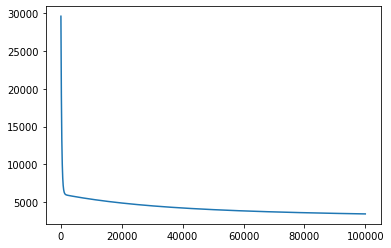

In [28]:
plt.plot(losses)
plt.show()

In [32]:
prediction = get_model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2961.815746024703

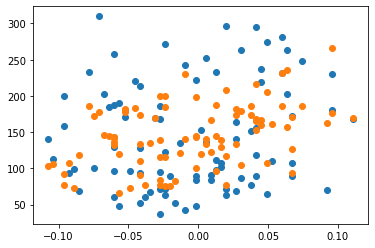

In [33]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()